# Install all equipment

In [ ]:
!pip install --upgrade pip
!pip install kats==0.1 ax-platform==0.2.3 statsmodels==0.12.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.2 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 46.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.6/353.6 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.5 MB/s eta 0:00:00


# Import Libraries

In [ ]:
import pandas as pd

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1O8vK1YCJuFW1LyBKAxT0UgR3dEOk28Xk
To: /content/Coal.csv
100% 10.8k/10.8k [00:00<00:00, 10.4MB/s]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Data Analysis

In [ ]:
df_coal = pd.read_csv("Coal.csv")

In [ ]:
df_coal

,Unnamed: 0,index,Date,Open,Close,High,Low
0,0,256,01/04/21,69.75,69.30,70.25,69.75
1,1,255,01/05/21,68.50,64.90,68.75,65.90
2,2,254,01/06/21,65.75,64.25,65.75,64.20
3,3,253,01/07/21,66.50,66.60,66.60,65.75
4,4,252,01/08/21,67.75,68.50,68.50,67.35
...,...,...,...,...,...,...,...
252,252,4,12/27/21,0.00,140.70,0.00,0.00
253,253,3,12/28/21,0.00,135.60,0.00,0.00
254,254,2,12/29/21,138.50,138.35,140.00,138.50
255,255,1,12/30/21,140.00,138.00,140.00,140.00


## Check Seasonalities


In [ ]:
df_coal["Date"] = df_coal["Date"].astype("datetime64")
df_coal.rename(columns = {'Date':'time'}, inplace = True)
df_coal_open = df_coal[["Open","time"]]

In [ ]:
from kats.consts import TimeSeriesData
from kats.detectors.seasonality import FFTDetector
ts = TimeSeriesData(df_coal_open)
fft_detector = FFTDetector(ts)
fft_detector.detector()

{'seasonalities': [], 'seasonality_presence': False}

Using this library, there is no seasonality for Open Coal Cost. So, we use ARIMA for predict Open Cost.

## Data Visualization

In [ ]:
df_coal_open = df_coal_open.set_index("time")
df_coal_open

,Open
time,
2021-01-04,69.75
2021-01-05,68.50
2021-01-06,65.75
2021-01-07,66.50
2021-01-08,67.75
...,...
2021-12-27,0.00
2021-12-28,0.00
2021-12-29,138.50


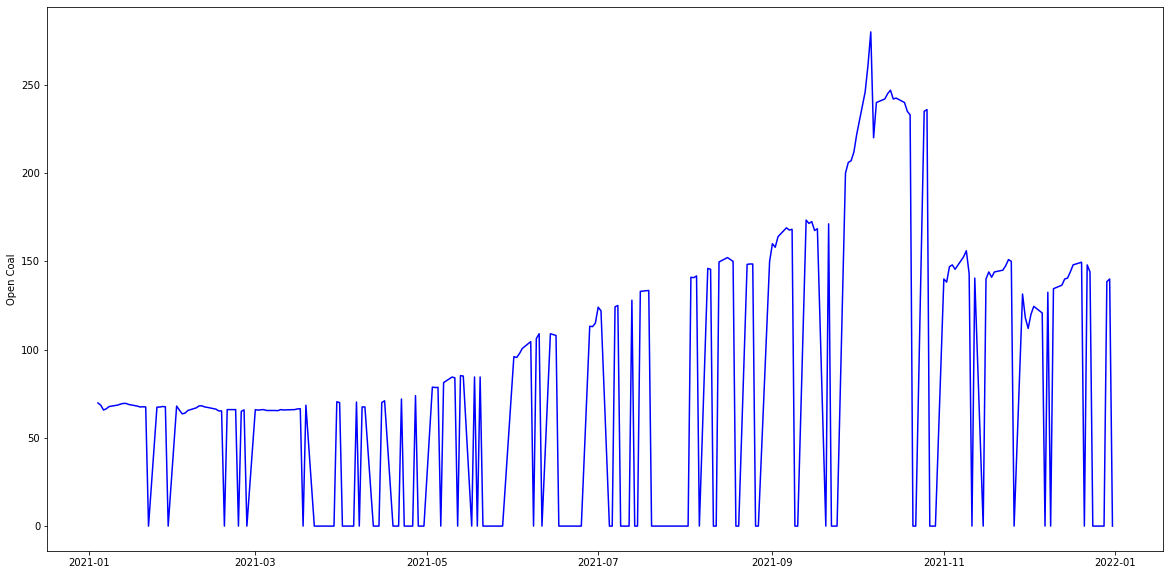

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(df_coal_open['Open'],color="blue", label = "Open Coal")
plt.ylabel('Open Coal')
plt.show()

Checking visualization above, there is no seasonally repeating pattern

In [ ]:
rolling_mean = df_coal_open['Open'].rolling(window = 30).mean()
rolling_std = df_coal_open['Open'].rolling(window = 30).std()

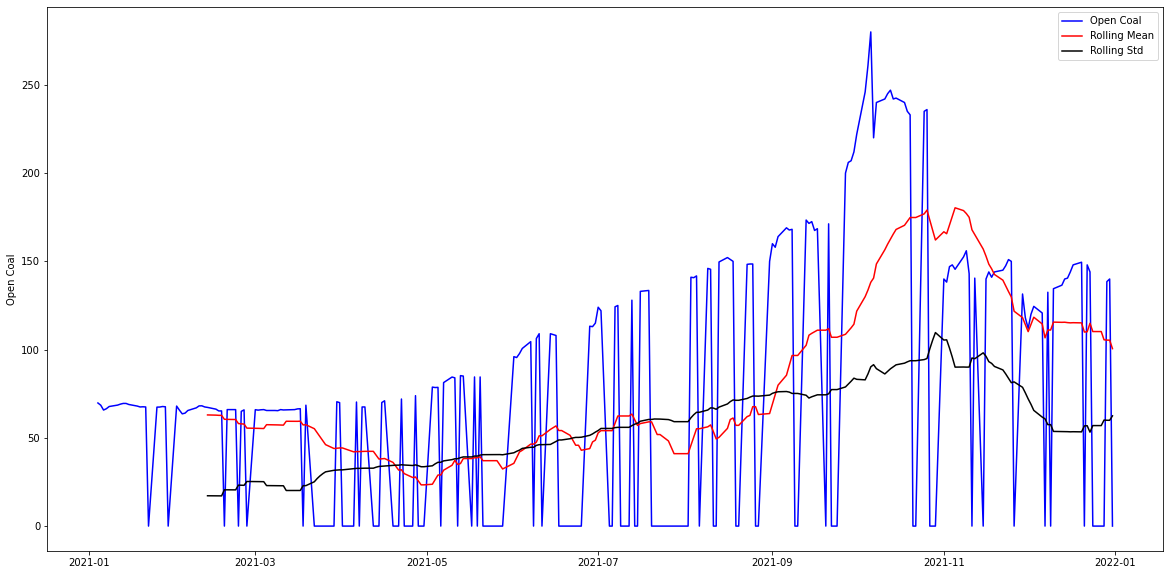

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(df_coal_open['Open'],color="blue", label = "Open Coal")
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc='best')
plt.ylabel('Open Coal')
plt.show()

## Check Stasionary

Check Open Coal Cost, there is stationary or not with ADF test. If p-value is <0.05 the hypothesis that data is stationary is true. 

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_coal_open.Open)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.887882
p-value: 0.002126


Because p-value < 0.05, there is evident that data is stationary. Beside that, graph rolling mean and std is constant, so strengthen the evidence that the data is stationary

# Time Series Analysis

## Making ARIMA Model

We using ARIMa because there is no seasonalities and data is stationary

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df_coal.Open, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2844.684, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3138.680, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2886.766, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3000.653, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2833.195, Time=0.97 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2877.085, Time=0.30 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2833.106, Time=1.14 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2857.091, Time=0.56 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2834.957, Time=1.52 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2833.191, Time=0.90 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2830.387, Time=1.39 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2831.600, Time=1.23 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2841.104, Time=0.46 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2832.378, Time=2.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept

## Model 1 : ARIMA using all data to predict

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



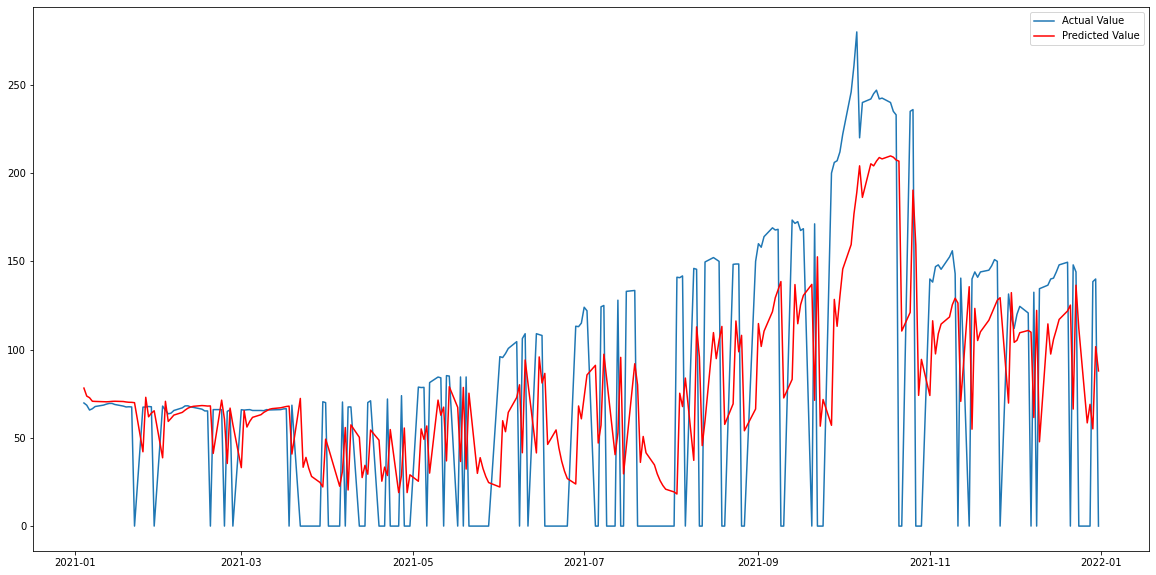

In [ ]:
model = ARIMA(df_coal_open.Open, order=(3,0,1))
results = model.fit(disp=-1)
plt.figure(figsize = (20,10))
plt.plot(df_coal_open.Open, label = "Actual Value")
plt.plot(results.fittedvalues, color='red', label = "Predicted Value")
plt.legend(loc='best')

In [ ]:
def forecast_accuracy(forecast, actual):
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mae': mae, 'rmse':rmse, })

forecast_accuracy(results.fittedvalues, df_coal_open.Open)

{'mae': 45.86544567465968, 'rmse': 58.14372215008538}

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



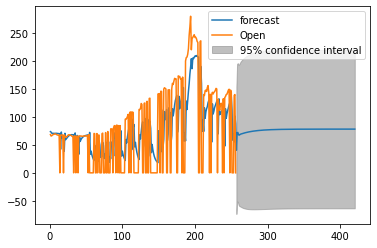

<Figure size 1440x720 with 0 Axes>

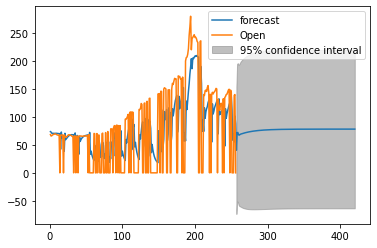

In [ ]:
plt.figure(figsize = (20,10))
results.plot_predict(1,420)



It can be concluded that the average difference in results is 45.8 with a not so large error marked by the RMSE value.

Estimated results until January - February the price of open coal is between 50 - 100

## Model 2 : Out-of-Time Cross validation (Training  = 70%)

In [ ]:
train = df_coal.Open[:180]
test = df_coal.Open[180:]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




                              ARMA Model Results                              
Dep. Variable:                   Open   No. Observations:                  180
Model:                     ARMA(3, 1)   Log Likelihood                -952.011
Method:                       css-mle   S.D. of innovations             47.884
Date:                Thu, 16 Jun 2022   AIC                           1916.023
Time:                        13:53:53   BIC                           1935.180
Sample:                             0   HQIC                          1923.790
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.4978     10.173      5.947      0.000      40.559      80.437
ar.L1.Open     1.0719      0.292      3.668      0.000       0.499       1.645
ar.L2.Open    -0.4447      0.141     -3.165      0.0

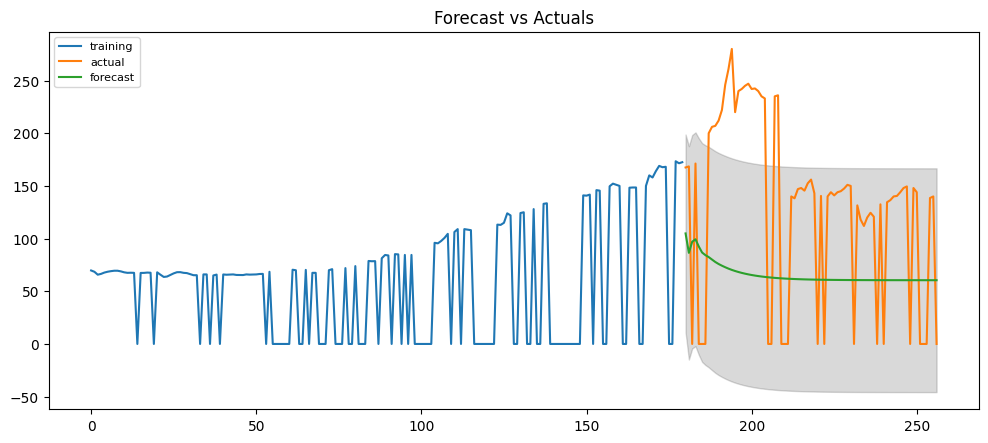

In [ ]:
# Build Model
model = ARIMA(train, order=(3, 0, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(77, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
def forecast_accuracy(forecast, actual):
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mae': mae, 'rmse':rmse, })

forecast_accuracy(fc, test)

{'mae': 98.24868897053071, 'rmse': 107.04125343128385}

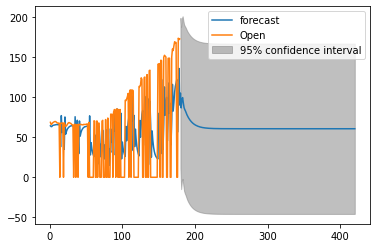

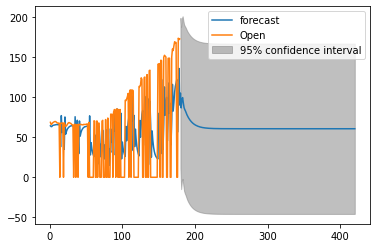

In [ ]:
fitted.plot_predict(1,420)

It can be concluded that the average difference in results is 98.2 with a very large error marked by a large RMSE value.

The result of the Open Coal price forecast for January - February 2022 is slightly above the price of 50.

## Model 3 : Out-of-Time Cross validation (Training  = 85%)

In [ ]:
train_1 = df_coal.Open[:220]
test_1 = df_coal.Open[220:]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




                              ARMA Model Results                              
Dep. Variable:                   Open   No. Observations:                  220
Model:                     ARMA(3, 1)   Log Likelihood               -1196.645
Method:                       css-mle   S.D. of innovations             55.612
Date:                Thu, 16 Jun 2022   AIC                           2405.289
Time:                        13:42:32   BIC                           2425.651
Sample:                             0   HQIC                          2413.512
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.2763     19.315      4.104      0.000      41.419     117.134
ar.L1.Open     1.1209      0.153      7.348      0.000       0.822       1.420
ar.L2.Open    -0.4454      0.113     -3.954      0.0

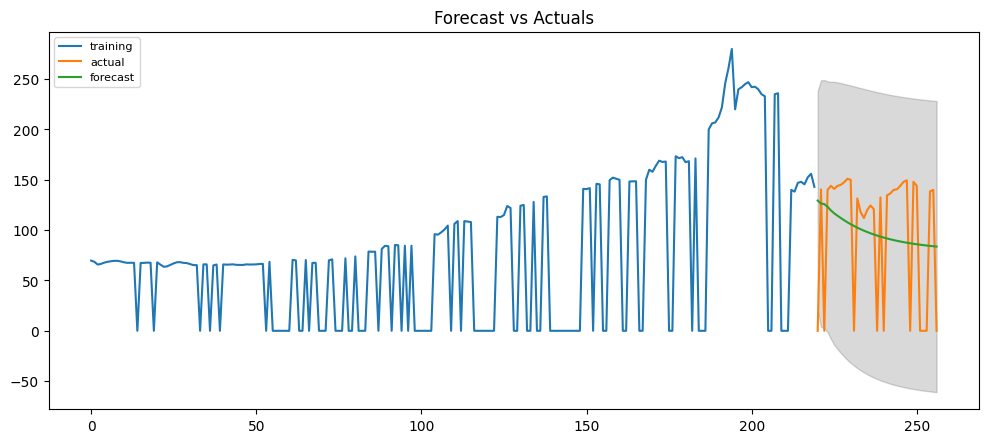

In [ ]:
# Build Model
model = ARIMA(train_1, order=(3, 0, 1))  
fitted_1 = model.fit(disp=-1)  
print(fitted_1.summary())

# Forecast
fc_1, se_1, conf_1 = fitted_1.forecast(37, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series_1 = pd.Series(fc_1, index=test_1.index)
lower_series_1 = pd.Series(conf_1[:, 0], index=test_1.index)
upper_series_1 = pd.Series(conf_1[:, 1], index=test_1.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_1, label='training')
plt.plot(test_1, label='actual')
plt.plot(fc_series_1, label='forecast')
plt.fill_between(lower_series_1.index, lower_series_1, upper_series_1, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
def forecast_accuracy(forecast, actual):
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mae': mae, 'rmse':rmse, })

forecast_accuracy(fc_1, test_1)

{'mae': 54.273461534652746, 'rmse': 62.279595818960885}

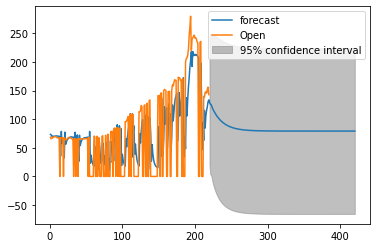

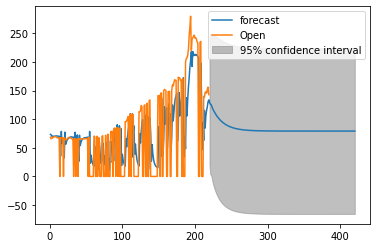

In [ ]:
fitted_1.plot_predict(1,420)

It can be concluded that the average difference in results is 54.3 with a not so large error indicated by the RMSE value.

The estimated results of the Open Coal price during January - February 2022 range from 50 - 100.

# Conclution

The best model obtained is Model 1, which does not apply Cross Validation because of the high level of accuracy, namely MAE: 45.8.

This is also supported by the Time Series chart of Open Coal Prices where in October and November increase drasticaly. So if we use Cross Validation that uses data for that month, it will produce a fairly large error.